**ПРИНЯТИЕ РЕШЕНИЯ В БИЗНЕСЕ. ОЦЕНКА AB ТЕСТА ДЛЯ ИНТЕРНЕТ-МАГАЗИНА**

**ОПИСАНИЕ ПРОЕКТА**

**Аналитику интернет-магазина совместно с отделом маркетинга нужно подготовить список гипотез для увеличения выручки.
Для этого требуется приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты**

**Часть 1. Приоритизация гипотез**

 В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
 
**Задача**

- 1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- 2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- 3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**

После проведения A/B-теста есть результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv

**Задача**

Проанализировать A/B-тест:

- 1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- 2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- 3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- 4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- 5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
Сделать выводы и предположения.
- 6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- 7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберить границу для определения аномальных пользователей.
- 8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- 9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберить границу для определения аномальных заказов.
- 10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- 11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- 12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- 13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

**Принять решение по результатам теста и объясните его. Варианты решений:**
- 1. Остановить тест, зафиксировать победу одной из групп.
- 2. Остановить тест, зафиксировать отсутствие различий между группами.
- 3. Продолжить тест.

**Описание данных**

**Данные для первой части**

Файл /datasets/hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

**Данные для второй части**

Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ

Файл /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка данных и библиотек

#### *Загрузка библиотек*

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from pandas.plotting import register_matplotlib_converters
import warnings
from matplotlib.ticker import ScalarFormatter

#### *Загрузка данных*

In [2]:
try:    
    hypothesis, orders, visitors = (
    pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\Принятие решений в бизнесе\\hypothesis.csv'),  # журнал гипотез
    pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\Принятие решений в бизнесе\\orders.csv'),  # журнал покупок
    pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\Принятие решений в бизнесе\\visitors.csv'),   # журнал пользователей
)
except:
    hypothesis, orders, visitors = (
    pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'), # журнал гипотез    
    pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),  # журнал покупок 
    pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv'), # журнал пользователей  
)    

#### *Вывод данных*

In [3]:
pd.set_option('max_colwidth', 200)
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### *Проверка дубликатов*

In [4]:
hypothesis.duplicated().sum()

0

In [5]:
orders.duplicated().sum()

0

In [6]:
visitors.duplicated().sum()

0

#### *Вывод информации о данных*

In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


В hypothesis все строки заполнены
Столбец Hypothesis имеет тип object, остальные столбцы имеют тип int64 

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В orders все строки заполнены
Столбцы date и group имеют тип object, остальные столбцы имеют тип int64. Столбец date необходимо перевести в другой тип 

In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В visitors все строки заполнены
Столбцы date и group имеют тип object, остальные столбцы имеют тип int64. Столбец date необходимо перевести в другой тип 

#### *Переименование столбцов*

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()

In [11]:
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId' : 'visitor_id'})


In [12]:
hypothesis = hypothesis.rename(columns = {'hypothesis' : 'hypothesa'})

#### *Преобразование данных о времени*

In [13]:
 hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesa   9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [14]:
 orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
# Группируем данные по visitor_id и считаем количество уникальных групп для каждого пользователя

duplicated_users = orders.groupby('visitor_id')['group'].nunique()
duplicated_users

visitor_id
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [18]:
# Определяем пользователей, которые встречаются в обеих группах (т.е. имеют более одной уникальной группы)

users_in_both_groups = duplicated_users[duplicated_users > 1].index
len(users_in_both_groups)

58

**Всего 58 пользователей, которые находятся в обеих группах**

In [19]:
# Удалим заказы пользователей, которые находятся в обеих группах

cleaned_orders = orders[~orders['visitor_id'].isin(users_in_both_groups)]
cleaned_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [20]:
 cleaned_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


#### *Вывод о данных*

- Датасет hypothesis содержит 9 строк и 5 столбцов. Отсутствуют пропуски и явные дубликаты
- Датасет cleaned_orders содержит 1016 строк и 5 столбцов. Отсутствуют пропуски и явные дубликаты. Удалили заказы пользователей, которые попали в обе группы. Далее будем использовать этот датасет для анализа
- Датасет visitors содержит 62 строки и 3 столбца. Отсутствуют пропуски и явные дубликаты

### Часть первая. Приоритизация гипотез

#### *Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета*

In [21]:
hypothesis.head()

,hypothesa,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [22]:
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)
hypothesis


,hypothesa,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20


#### *Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета*

In [23]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis


,hypothesa,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


#### *Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло*

In [24]:
hypothesis[['hypothesa','ICE']].sort_values(by='ICE', ascending = False)

,hypothesa,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Топ-4 ICE-гипотез:

    № 8
    № 0
    № 7
    № 6
    

In [25]:
hypothesis[['hypothesa','RICE']].sort_values(by='RICE', ascending=False)


,hypothesa,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Топ-4 RICE-гипотез:

    № 7
    № 2
    № 0
    № 6


**Вывод:**

Как видно для параметров ICE и RICE список их приоритетных гипотез похож: № 0, № 6, № 7 входят в оба списка, но с разными приоритетами. 
- Для RICE на первом и втором местах № 7 и № 2, т. к. их reach очень высокий, т. е. затронет максимальное количество пользователей.  
- Для ICE reach не учитывается, поэтому на первом месте там № 8 с большим impact и confidence. № 2 не входит в ТОП-4 ICE, т. к. у него низкий impact, но это компенсируется большим reach, поэтому он появляется в ТОП-4 RICE.

Кроме силы гипотезы важно учитывать как много пользователей она затронет

На основе вышеизложенного, гипотеза №7 является хорошим кандидатом для первой гипотезы для тестирования, так как она имеет высокий reach и занимает первые позиции в обоих списках. Она затронет максимальное количество пользователей и имеет достаточную силу для получения значимых результатов.



### Часть вторая. Анализ A/B-теста

#### *Построить график кумулятивной выручки по группам. Сделать выводы и предложения*

In [26]:
# Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders
datesGroups = cleaned_orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [27]:
# Создадим таблицу ordersAggregated - будто мы ежедневно считали результаты тестирования до выбранного дня включительно 
# и сохраняли их в строках таблицы 

ordersAggregated = datesGroups.apply(lambda x: cleaned_orders[np.logical_and(cleaned_orders['date'] <= x['date'], cleaned_orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [28]:
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [29]:
# Создадим таблицу visitorsAggregated - агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [30]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [31]:
# Объединим обе таблицы в одну с понятными названиями столбцов

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [32]:
# Проверим корректность cumulativeData - 
# совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных
print(cumulativeData['date'].min())
print(cumulativeData['date'].max())
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00


Даты совпадают, cumulativeData создана корректно

In [33]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head() 

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


In [34]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()


,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


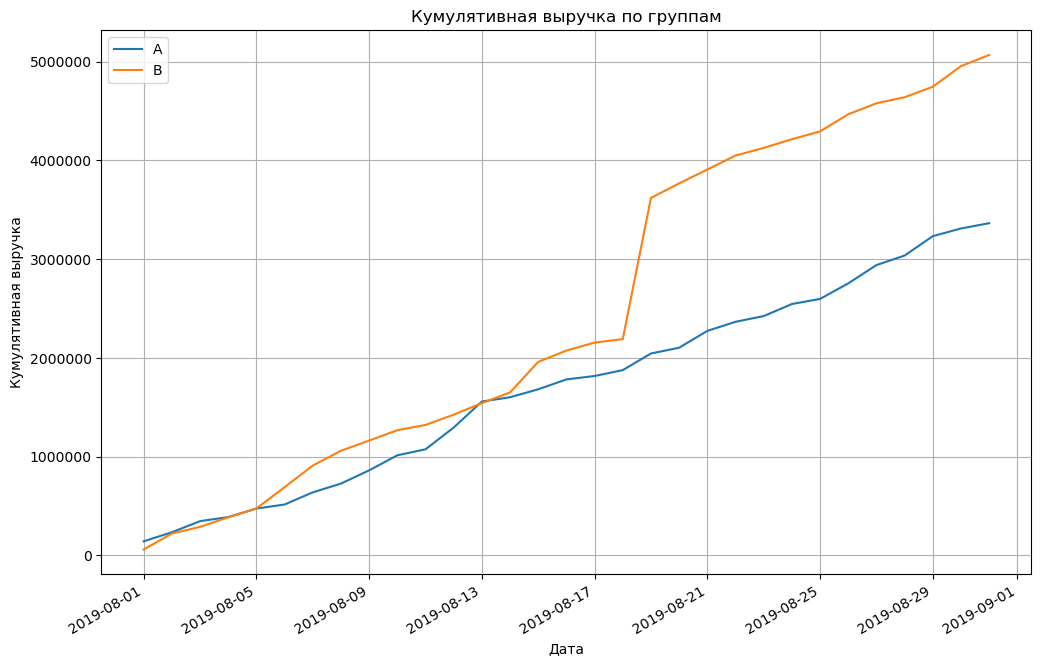

In [35]:
plt.figure(figsize=(12, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

# Форматируем ось X для предотвращения дублирования меток
plt.gcf().autofmt_xdate()

# Устанавливаем обычный формат чисел по оси Y без запятых
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по группам')

plt.gca().grid(True)
# Отображаем график
plt.show()

**Вывод:** 

Выручка почти равномерно увеличивается в течение всего теста. 
Однако график выручки группы В в одной точке резко растёт. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке

#### *Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения*

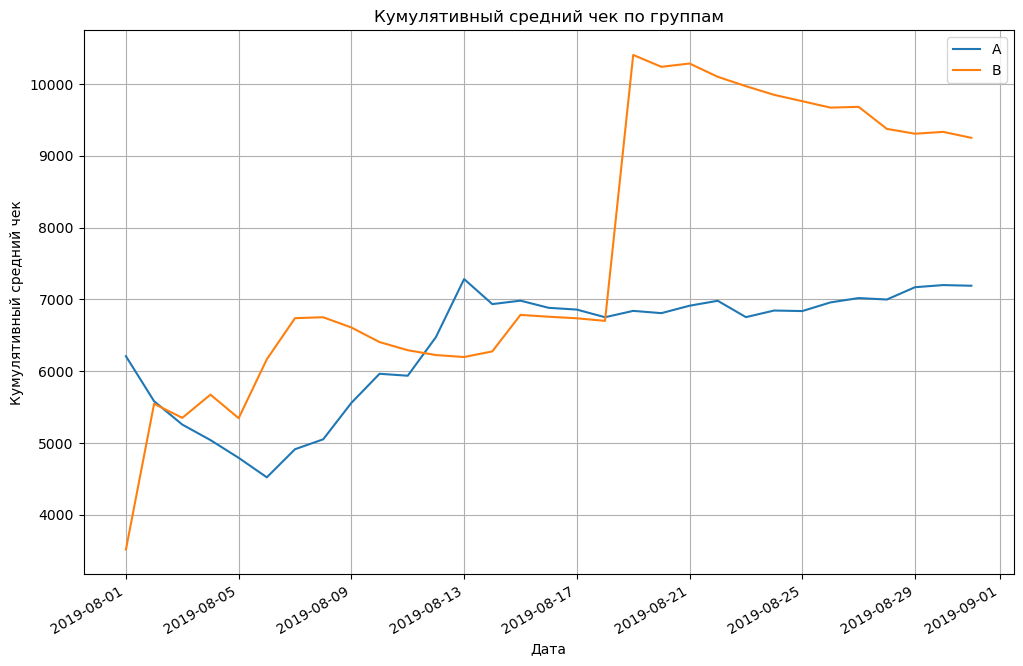

In [36]:
plt.figure(figsize=(12, 8))
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

# Форматируем ось X для предотвращения дублирования меток
plt.gcf().autofmt_xdate()

# Устанавливаем обычный формат чисел по оси Y без запятых
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.gca().grid(True)
# Отображаем график
plt.show()

**Вывод:**
- Группа А - средний чек вначале колеблется в переделах 5000 - 7000 тысяч, при постоянно растущей вырычке возможо есть разброс в количестве заказов. В дальнейшем средний чек стабилизируется в районе 7000 тысяч.
- Группа В - средний чек вначале также колеблется в переделах 5000 - 7000 тысяч, затем резкий скачок до 10000 тысяч и плавная стабилизация на уровне 9000 тысяч. Резкий скачок среднего чека совпадает со скачком выручки в данной группе, что подтверждает предположение о появлении дрогих заказов.
- В целом группа В более привлекательна чем группа А

#### *Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения*

In [37]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()


,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


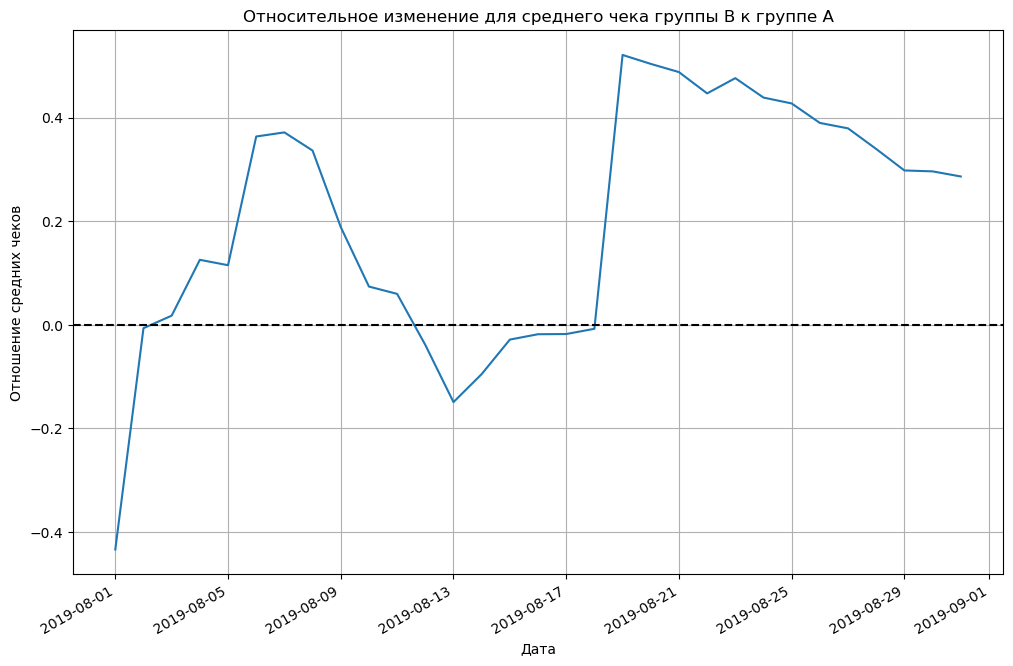

In [38]:
plt.figure(figsize=(12, 8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
# Форматируем ось X для предотвращения дублирования меток
plt.gcf().autofmt_xdate()
# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.title('Относительное изменение для среднего чека группы В к группе А')
plt.gca().grid(True)
# Отображаем график
plt.show()

**Вывод:**

Группа В явно выигрывает у группы А, если не считать одного провала в середине теста, резкий скачок еще раз говорит о крупных заказах

#### *Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения*

In [39]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


In [40]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390
4,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,A,99,92,474413,3318,0.029837


In [41]:
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,59758,713,0.023843
3,2019-08-02,B,40,39,221801,1294,0.030912
5,2019-08-03,B,54,53,288850,1803,0.029950
7,2019-08-04,B,68,66,385740,2573,0.026428
9,2019-08-05,B,89,87,475648,3280,0.027134


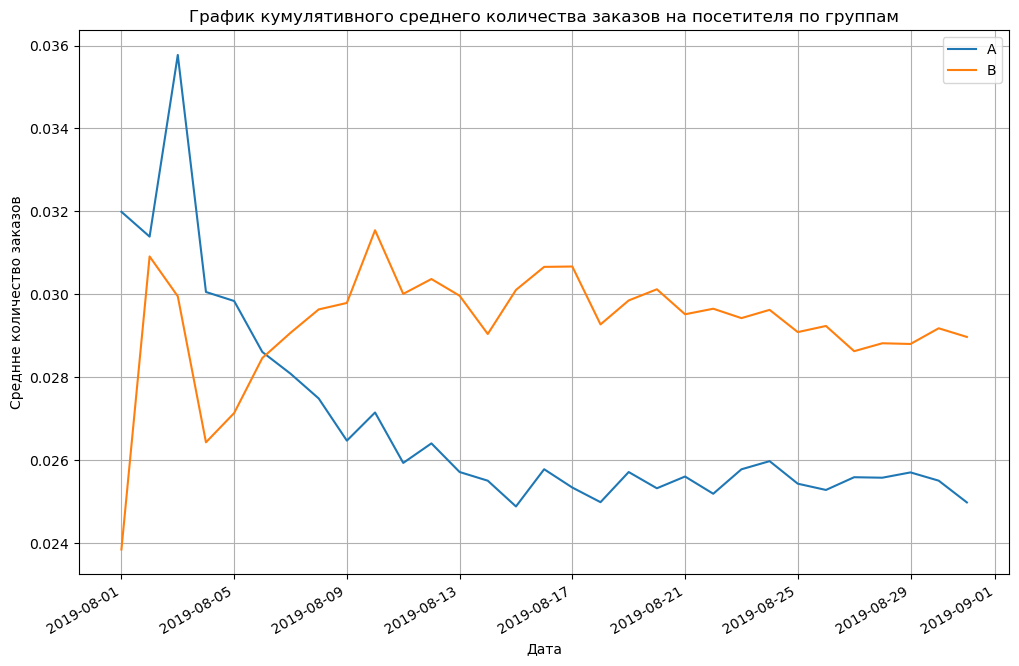

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# Форматируем ось X для предотвращения дублирования меток
plt.gcf().autofmt_xdate()

# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Дата')
plt.ylabel('Среднне количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.gca().grid(True)

plt.show()


**Вывод**

Сначала в обеих группах есть довольно большие скачки, затем графики становятся симметричны, но группа А идет вниз, а группа В вверх.

Разброс среднего количества заказов на посетителя м/у группами 0.029 - 0.037. 

#### *Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения*

In [43]:
# собираем данные в одном датафрейме

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


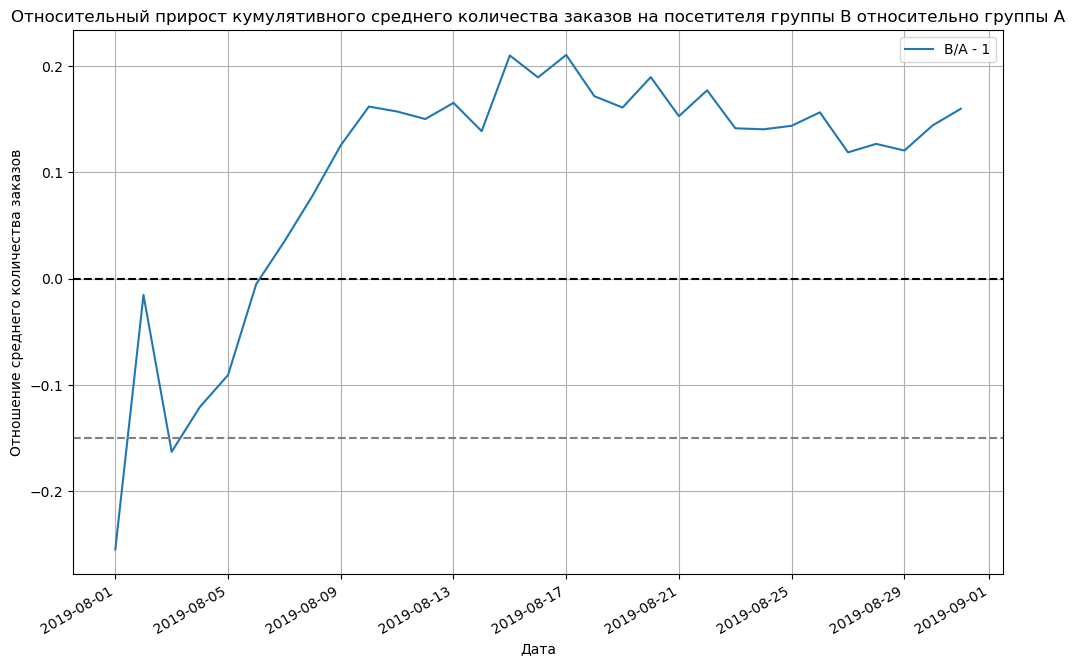

In [44]:
plt.figure(figsize=(12, 8))
# Строим график 

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,label='B/A - 1')
plt.legend()

# Форматируем ось X для предотвращения дублирования меток
plt.gcf().autofmt_xdate()
# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Дата')
plt.ylabel('Отношение среднего количества заказов')
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.15, color='grey', linestyle='--')
plt.gca().grid(True)
plt.show()

**Вывод:**
Сначала группа В проигрывала группе А, но затем вырвалась вперед, большее количество пользователей стали покупателями. Отрыв м/у группами довольно большой

#### *Построить точечный график стоимости заказов по пользователям. Сделать выводы и предположения*

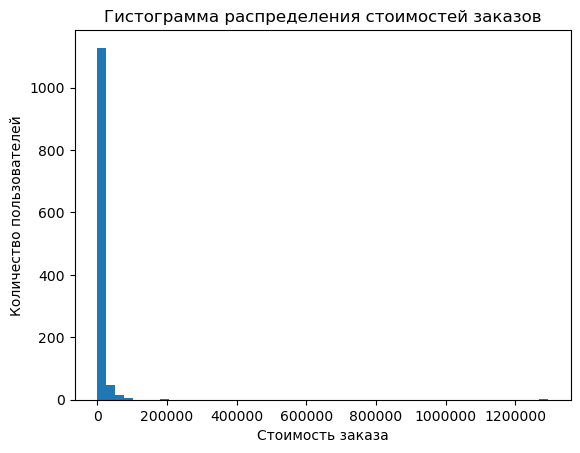

In [45]:

plt.hist(orders['revenue'], bins=50) 
# Настройка формата оси X с использованием FuncFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))
# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения стоимостей заказов')
plt.show()

**Вывод**: 
В данных есть заказы на сумму 200 000 рублей и даже супер дорогой заказ на сумм более 1 200 000 рублей! 

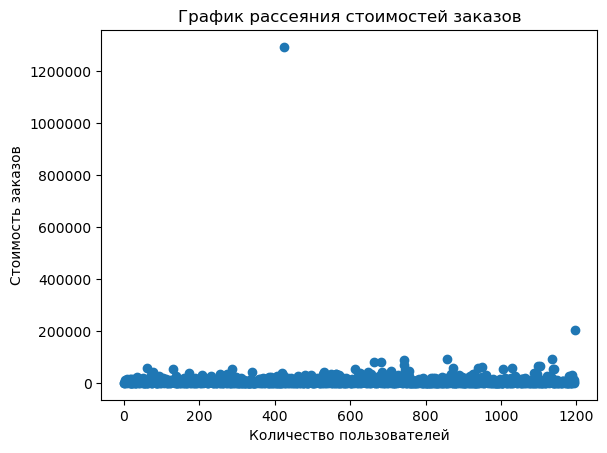

In [46]:

# Строим диаграмму рассеяния
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

# Устанавливаем обычный формат чисел 
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title('График рассеяния стоимостей заказов')
plt.show()

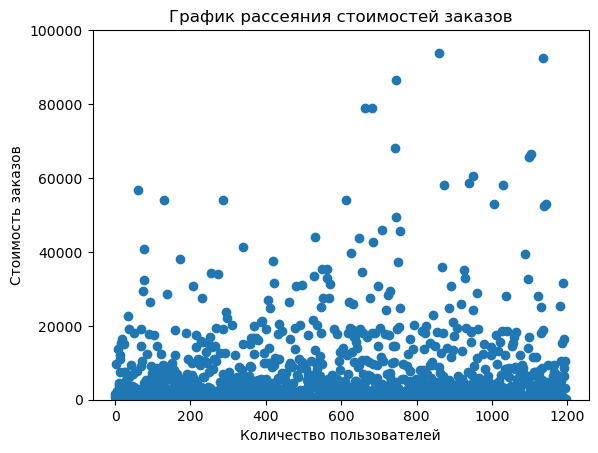

In [47]:

# Строим диаграмму рассеяния
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

# Ограничиваем значения по оси Y
plt.ylim(0, 100000)

# Устанавливаем обычный формат чисел 
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title('График рассеяния стоимостей заказов')
plt.show()

**Вывод**:
Подтверждается заказ на сумму 200 000 рублей и супер дорогой заказ на сумму 1 200 000 рублей - это выбросы, основная часть заказов находится в пределах до 30 000 рублей, есть часть заказов 30 000 - 60 000 рублей    

#### *Посчитать 95-й и 99-й перцентили стоимости заказов на пользователя. Выбрать границу для определения аномальных пользователей*

In [48]:
# Определим 90, 95 и 99 перцентили среднего чека в выборке
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


**Вывод:**

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Будем считать 95 перцентиль границей выбросов

#### Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

In [49]:
# Подсчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


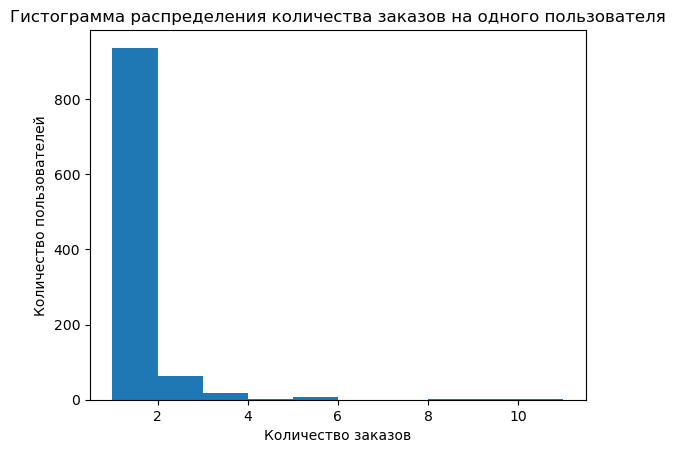

In [50]:
# Построим гистрограмму распределения количества заказов на одного пользователя
plt.hist(ordersByUsers['orders']) 

# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения количества заказов на одного пользователя')
plt.show()

**Вывод:**

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже имеется

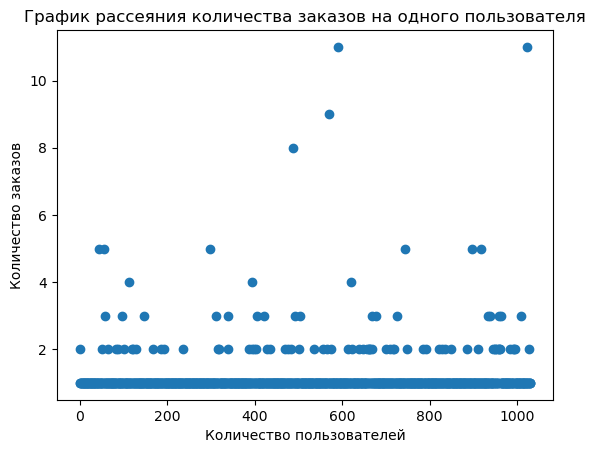

In [51]:
# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

# Добавляем подписи к осям и заголовок для лучшего понимания графика
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('График рассеяния количества заказов на одного пользователя')
plt.show()

**Вывод:**

Диаграмма рассеяния подверждает гистограмму - большинство пользователей с 1-4 заказами

#### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей

In [52]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя

print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


**Вывод:**

Не более 5% пользователей оформляли больше чем 4 заказа. И 10% пользователей заказывали более 2-х раз. 
Разумно выбрать 95-й перцентиль (2 заказа на одного пользователя) за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней

#### *Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения*

Сформулируем гипотезы:

- H0 = Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет
- H1 = Статистически значимые различия в среднем количестве заказов между группами по "сырым" данным есть

In [53]:
# Сгруппируем данные о количестве посетителей в группе А по дням

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()



,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [54]:
# Посчитаем количество посетителей по дням с накоплением

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [55]:
# # Сгруппируем данные о количестве посетителей в группе B по дням
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [56]:
# Посчитаем количество посетителей по дням с накоплением
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [57]:
# Сгруппируем данные о количестве заказов в группе А по дням
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [58]:
# Посчитаем количество заказов по дням с накоплением
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [59]:
# Сгруппируем данные о количестве заказов в группе B по дням
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [60]:
# Посчитаем количество заказов по дням с накоплением
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [61]:
# Объединим все данные в один датасет
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [62]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'].
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [63]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [64]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [65]:
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [66]:
sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

В sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().
Выведем относительный прирост среднего количества заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1. Проверим выборки критерием Манна-Уитни. 

**Примем alpha = 0.05**

In [67]:
# Применим критерий Манна-Уитни

p_value = st.mannwhitneyu(sampleA, sampleB)[1]
relative_gain = sampleB.mean() / sampleA.mean() - 1

print("P-value: {0:.3f}".format(p_value))
print("Относительный выигрыш группы B относительно группы A: {0:.3f}".format(relative_gain))


P-value: 0.017
Относительный выигрыш группы B относительно группы A: 0.138


**Вывод:**
- p-value = 0.017 < 0.05 По «сырым» данным различия в среднем числе заказов групп A и B есть. Следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем

- Относительный выигрыш группы B равен 13.8 % 

#### *Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения*

Сформулируем гипотезы: 

- H0 = Статистически значимых различий в среднем чеке между группами по "сырым" данным нет
- H1 = Статистически значимые различия в среднем чеке между группами по "сырым" данным есть



In [68]:
# Применим криетрий Манна-Уитни

p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
relative_gain = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

print("P-value: {0:.3f}".format(p_value))
print("Относительный выигрыш группы B относительно группы A: {0:.3f}".format(relative_gain))


P-value: 0.729
Относительный выигрыш группы B относительно группы A: 0.259


**Вывод:**

- p-value значительно больше 0.05. Значит, по "сырым" данным причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет, оставляем нулевую гипотезу

- Средний чек группы B значительно выше среднего чека группы A, однако это различие не является статистически значимым

#### *Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения*

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [69]:
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [70]:
# Вычисляем 95-й процентиль заказов
percentile_95_order = np.percentile(ordersByUsers['orders'], 95)
percentile_95_order

2.0

In [71]:
# Получаем пользователей, совершивших заказы дороже 95-го процентиля
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentile_95_order]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > percentile_95_order]['userId'],
    ],
    axis=0,
)    

usersWithManyOrders.head() 




18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: userId, dtype: int64

In [72]:
# Вычисляем 95-й процентиль выручки
percentile_95 = np.percentile(orders['revenue'], 95)

# Получаем пользователей, совершивших заказы дороже 95-го процентиля
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_95]['transaction_id']
usersWithExpensiveOrders.head()



60     1421016313
73     1295850747
77     2619374735
78      773663763
131    3163614039
Name: transaction_id, dtype: int64

In [73]:
# Объединим их в таблице abnormalUsers.
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers

858      192721366
18       199603092
23       237748145
37       249864742
1099     316924019
           ...    
613     4071177889
1189    4082620617
627     4212256267
549     4243941421
499     4256040402
Length: 80, dtype: int64

In [74]:
abnormalUsers.shape[0]

80

**Всего 80 нормальных пользователей**

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным

In [75]:
# Подготовим выборки количества заказов по пользователям по группам теста

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleAFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [76]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
sampleBFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Сформулируем гипотезы:

- H0 = Статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным нет
- H1 = Статистически значимые различия в среднем количестве заказов между группами по "очищенным" данным есть

**Применим статистический критерий Манна-Уитни к полученным выборкам**

**Примем alpha = 0.05**

In [77]:
# Применим криетрий Манна-Уитни

p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
relative_gain = sampleBFiltered.mean()/sampleAFiltered.mean()-1

print("P-value: {0:.3f}".format(p_value))
print("Относительный выигрыш группы B относительно группы A: {0:.3f}".format(relative_gain))


P-value: 0.012
Относительный выигрыш группы B относительно группы A: 0.170


**Вывод:** 

**По очищенным данным:**

- p-value = 0.012 < 0.05 различия в среднем числе заказов групп A и B есть. Следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем
- Относительный выигрыш группы B равен 17 % — второе число в выводе

**По "сырым данным":**

- p-value = 0.017 < 0.05 различия в среднем числе заказов групп A и B есть. Следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем
- Относительный выигрыш группы B равен 13.8 % — второе число в выводе

**p-value остался почти такой же, разница м/у сегментами увеличилась на 3.2 %**

#### *Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения*

Сформулируем гипотезы:

- H0 = Статистически значимых различий в среднем чеке между группами по "очищенным" данным нет
- H1 = Статистически значимые различия в среднем чеке между группами по "очищенным" данным есть

**Применим статистический критерий Манна-Уитни к полученным выборкам**

**Примем alpha = 0.05**

In [78]:
p_value = st.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue']
)[1]
p_value

0.6605988588102022

In [79]:
relative_gain = (orders[np.logical_and(orders['group'] == 'B',
                                                np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() /
                         orders[np.logical_and(orders['group'] == 'A',
                                                np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)
relative_gain

0.23413431718311428

In [80]:
print("P-value: {0:.3f}".format(p_value))
print("Относительный выигрыш группы B относительно группы A: {0:.3f}".format(relative_gain))

P-value: 0.661
Относительный выигрыш группы B относительно группы A: 0.234


**Вывод:** 

**По очищенным данным:**

- p-value = 0.661 > 0.05 различий в среднем числе заказов групп A и B нет. Следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, оставляем
- Относительный выигрыш группы B равен 23.4 % — второе число в выводе

**По "сырым данным":**

- p-value = 0.729 > 0.05 различий в среднем числе заказов групп A и B нет. Следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, оставляем
- Относительный выигрыш группы B равен 25.9 % — второе число в выводе

**p-value увеличился, но т разница м/у сегментами уменьшилась на 2.5 %**

### ВЫВОД:

1. **Методика оценки с использованием RICE и ICE**:
   - В методике RICE на первых местах оказались гипотезы №7 и №2, поскольку у них очень высокий показатель reach (охват), что означает максимальное количество затронутых пользователей.
   - В методике ICE, где охват не учитывается, на первом месте находится гипотеза №8 благодаря высокому impact (влиянию) и confidence (уверенности). Гипотеза №2 не входит в ТОП-4 по ICE из-за низкого impact, но компенсируется большим reach, что позволяет ей появиться в ТОП-4 по RICE.

2. **Анализ выручки**:
   - Выручка группы В резко возрастает в одной точке, что может указывать на всплеск числа заказов или на появление очень дорогих заказов в выборке.
   - Средний чек группы А сначала колеблется в пределах 5000-7000 рублей, что может указывать на разброс в количестве заказов при постоянно растущей выручке. Затем средний чек стабилизируется около 7000 рублей.
   - Средний чек группы В также колеблется в начале в пределах 5000-7000 рублей, затем происходит резкий скачок до 10000 рублей с последующей стабилизацией на уровне 9000 рублей. Этот скачок совпадает с резким ростом выручки, что подтверждает гипотезу о появлении дорогих заказов.

3. **Сравнение групп А и В**:
   - Группа В более привлекательна, чем группа А, несмотря на один провал в середине теста. Резкий скачок среднего чека в группе В указывает на крупные заказы.
   - Вначале графики обеих групп имеют большие колебания, затем они становятся более симметричными. Однако, группа А начинает показывать снижение, в то время как группа В демонстрирует рост.
   - Группа В сначала отставала от группы А, но затем вырвалась вперед, что указывает на увеличение числа покупателей. Отрыв между группами довольно значительный.

4. **Анализ заказов и поведения пользователей**:
   - В данных присутствуют заказы на сумму 20000 рублей и один супер дорогой заказ на сумму более 1200000 рублей.
   - Не более 5% заказов дороже 28000 рублей и не более 1% заказов дороже 58233 рублей.
   - Большинство покупателей сделали только один заказ. Однако, значительная доля пользователей оформила 2-4 заказа.
   - Не более 5% пользователей совершали более 4 заказов, а 10% пользователей сделали более 2-х заказов.
   - Разумно выбрать верхнюю границу в 3 заказа на одного пользователя для отсечения аномальных пользователей.

#### Результаты статистических тестов

1. **Среднее количество заказов на пользователя**:
   - **По очищенным данным**:
     - p-value = 0.012 < 0.05. Различия в среднем числе заказов между группами A и B есть. Следовательно, нулевую гипотезу о том, что статистически значимых различий нет, отвергаем.
     - Относительный выигрыш группы B равен 17.0%.
   - **По сырым данным**:
     - p-value = 0.017 < 0.05. Различия в среднем числе заказов между группами A и B есть. Следовательно, нулевую гипотезу о том, что статистически значимых различий нет, отвергаем.
     - Относительный выигрыш группы B равен 13.8%.

2. **Средний чек**:
   - **По очищенным данным**:
     - p-value = 0.661 > 0.05. Различий в среднем чеке между группами A и B нет. Следовательно, нулевую гипотезу о том, что статистически значимых различий нет, не отвергаем.
     - Относительный выигрыш группы B равен 23.4%.
   - **По сырым данным**:
     - p-value = 0.729 > 0.05. Различий в среднем чеке между группами A и B нет. Следовательно, нулевую гипотезу о том, что статистически значимых различий нет, не отвергаем.
     - Относительный выигрыш группы B равен 25.9%.

### Общие выводы по результатам теста

- Нет статистически значимых различий по среднему количеству заказов между группами ни по "сырым", ни по данным после фильтрации аномалий.
- Есть статистически значимые различия по среднему чеку между группами как по "сырым", так и по данным после фильтрации аномалий.
- Группа В более привлекательна, чем группа А, несмотря на один провал в середине теста. Резкий скачок среднего чека в группе В указывает на крупные заказы.

Таким образом, результаты теста показывают, что группа В имеет преимущество по среднему чеку, что делает её более привлекательной для бизнеса. Важно учитывать как количественные, так и качественные аспекты поведения пользователей при принятии дальнейших бизнес-решений.

### Продолжение или остановка теста:
Остановить тест, зафиксировать победу одной из групп:

Группа B показывает значительное улучшение в среднем количестве заказов. Это ключевой показатель для бизнеса, поскольку большее количество заказов ведет к увеличению общей выручки.
Несмотря на отсутствие статистически значимых различий по среднему чеку, группа B все же показывает относительный выигрыш.

Продолжение теста может дать дополнительные данные и подтвердить или опровергнуть текущие результаты. Однако, учитывая, что уже достигнута статистическая значимость по ключевому показателю, это может не быть необходимым.
Рекомендованное решение:
Остановить тест, зафиксировать победу группы B.

Обоснование:
Группа B демонстрирует статистически значимое улучшение по среднему количеству заказов, что является важным показателем для увеличения выручки.
Относительный выигрыш по среднему чеку также в пользу группы B, хотя и не является статистически значимым.
Продолжение теста может потребовать дополнительных ресурсов и времени, но текущие данные уже дают основание для принятия решения.
Таким образом, с учетом всех факторов, рекомендуется зафиксировать победу группы B и внедрить изменения, которые были тестированы в этой группе, для повышения эффективности бизнеса.